In [12]:
# Load libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

In [13]:
# Read in the data
students = pd.read_csv('students.csv')
print(students.head())

   score  completed    lesson
0   82.7         35  Lesson A
1   65.2         31  Lesson A
2   55.3         33  Lesson A
3   28.8         25  Lesson B
4   31.2         18  Lesson B


In [14]:
# Fit a linear regression to predict score based on prior lessons completed
model_1 = sm.OLS.from_formula('score ~ completed', data=students).fit()
print(model_1.summary())

# Print the coefficients        
print("Intercept = ", model_1.params[0])
print("Slope = ", model_1.params[1])

                            OLS Regression Results                            
Dep. Variable:                  score   R-squared:                       0.461
Model:                            OLS   Adj. R-squared:                  0.456
Method:                 Least Squares   F-statistic:                     83.90
Date:                Wed, 14 May 2025   Prob (F-statistic):           8.07e-15
Time:                        13:48:19   Log-Likelihood:                -394.87
No. Observations:                 100   AIC:                             793.7
Df Residuals:                      98   BIC:                             799.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     13.2141      4.567      2.894      0.0

C:\Users\dipid\AppData\Local\Temp\ipykernel_25512\1581124900.py:6: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print("Intercept = ", model_1.params[0])
C:\Users\dipid\AppData\Local\Temp\ipykernel_25512\1581124900.py:7: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print("Slope = ", model_1.params[1])


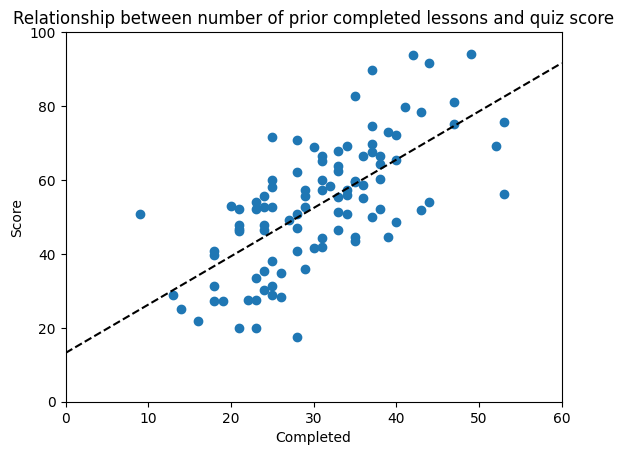

<Figure size 640x480 with 0 Axes>

In [15]:
# Plot the scatter plot with the line on top
plt.scatter(students['completed'],students['score'])
plt.xlabel("Completed")
plt.ylabel("Score")
plt.title("Relationship between number of prior completed lessons and quiz score")
x = np.linspace(0,60,60)
X = np.vstack([np.ones_like(x), x]).T
y = np.dot(X,model_1.params)
plt.plot(x,y,'k--')
plt.xlim([0,60])
plt.ylim([0,100])
plt.show()
plt.clf()

In [16]:
# Predict score for learner who has completed 20 prior lessons
score = model_1.predict(pd.DataFrame({'completed':[20]}))
print("Score of a learner who has completed 20 prior lessons = ", score.values[0])

# Calculate fitted values
fitted_values = model_1.predict(students['completed'])
# Calculate residuals
residuals = students['score']-fitted_values 

Score of a learner who has completed 20 prior lessons =  39.350624877322936


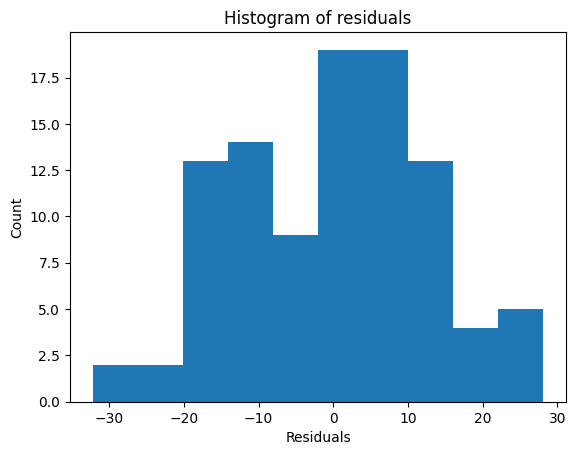

<Figure size 640x480 with 0 Axes>

In [17]:
# Check normality assumption
plt.title("Histogram of residuals")
plt.hist(residuals)
plt.xlabel("Residuals")
plt.ylabel("Count")
plt.show()
plt.clf()

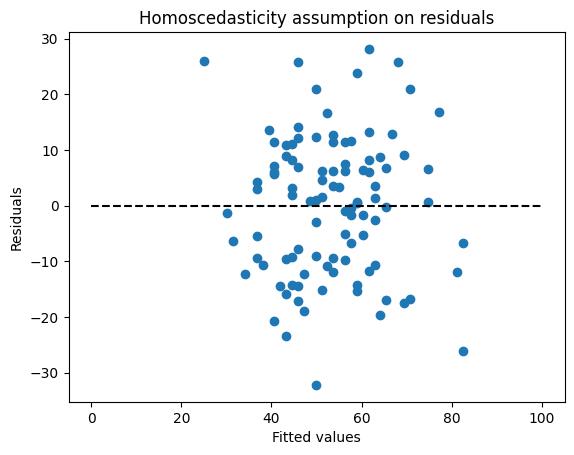

<Figure size 640x480 with 0 Axes>

In [18]:
# Check homoscedasticity assumption
plt.scatter(fitted_values, residuals)
plt.title("Homoscedasticity assumption on residuals")
plt.plot([0,100],[0,0],'k--')
plt.xlabel("Fitted values")
plt.ylabel("Residuals")
plt.show()
plt.clf()

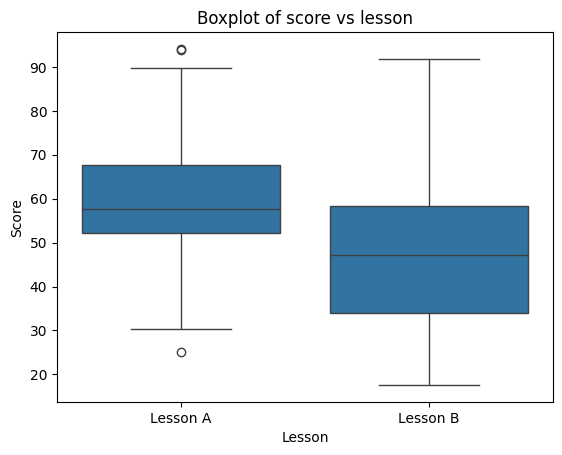

<Figure size 640x480 with 0 Axes>

In [19]:
# Create a boxplot of score vs lesson
sns.boxplot(x = 'lesson', y = 'score', data = students)
plt.xlabel("Lesson")
plt.ylabel("Score")
plt.xticks([0,1], ['Lesson A', 'Lesson B'])
plt.title("Boxplot of score vs lesson")
plt.show()
plt.clf()

In [20]:
# Fit a linear regression to predict score based on which lesson they took
model_2 = sm.OLS.from_formula('score ~ lesson', data=students).fit()
print(model_2.summary())
# Print the coefficients        
print("Intercept = ", model_2.params[0])
print("Slope = ", model_2.params[1])

                            OLS Regression Results                            
Dep. Variable:                  score   R-squared:                       0.116
Model:                            OLS   Adj. R-squared:                  0.107
Method:                 Least Squares   F-statistic:                     12.85
Date:                Wed, 14 May 2025   Prob (F-statistic):           0.000529
Time:                        13:48:20   Log-Likelihood:                -419.64
No. Observations:                 100   AIC:                             843.3
Df Residuals:                      98   BIC:                             848.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept             59.2200      2

C:\Users\dipid\AppData\Local\Temp\ipykernel_25512\380441854.py:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print("Intercept = ", model_2.params[0])
C:\Users\dipid\AppData\Local\Temp\ipykernel_25512\380441854.py:6: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print("Slope = ", model_2.params[1])


In [21]:
# Calculate and print the group means and mean difference (for comparison)
groupmeans = students[['score','lesson']].groupby('lesson').mean()
mean_diff = groupmeans.loc['Lesson A', 'score'] - groupmeans.loc['Lesson B', 'score']
print("Mean Difference = ", mean_diff)

Mean Difference =  11.641999999999996


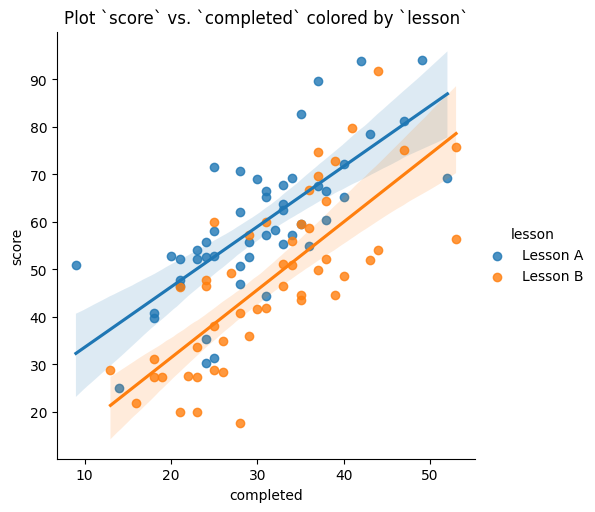

In [22]:
# Use `sns.lmplot()` to plot `score` vs. `completed` colored by `lesson`
sns.lmplot(x = 'completed', y = 'score', hue = 'lesson', data = students)
plt.title("Plot `score` vs. `completed` colored by `lesson`")
plt.show()